In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from minisom import MiniSom
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('standardized_result.csv')
features_scaled = df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'wiki view Oct 2024_T','github user count_T','search count Oct 2024_T',
        'stack_overflow_count_2024_T','location_count_T']]
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,github user count,wiki view Oct 2024,search count Oct 2024,stack_overflow_count_2024,location_count,tiobe index ratings_T,job amount_T,average salary_T,linkedin skill_T,wiki view Oct 2024_T,github user count_T,search count Oct 2024_T,stack_overflow_count_2024_T,location_count_T
0,Java,10.51,728,6.153528e+06,103000,6800,1577.0,13,202,12,4.602523,4.471072,-0.234475,4.029507,2.356876,5.065941,0.363212,2.071070,2.917045
1,JavaScript,3.54,1111,6.168157e+06,118000,11400,2134.0,18,474,12,1.395774,7.029718,-0.232846,4.658651,3.292547,8.626879,0.663600,5.339627,2.917045
2,Dart,0.56,32,6.250161e+06,945,877,170.0,0,129,6,0.024739,-0.178580,-0.223714,-0.250981,-0.006662,0.480846,-0.417797,1.193847,0.930730
3,Node.js,0.00,450,5.596209e+06,34000,-1,399.0,4,291,8,-0.232905,2.613884,-0.296539,1.135443,0.378022,-0.198829,-0.177486,3.140561,1.592835
4,PHP,1.21,505,5.762279e+06,123000,8600,1445.0,16,272,11,0.323790,2.981313,-0.278045,4.868366,2.135136,6.459352,0.543445,2.912243,2.585993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1,-1.0,0,0,1,-0.232905,-0.385677,-0.296912,-0.290617,-0.293915,-0.198829,-0.417797,-0.356314,-0.724532
171,VBScript,0.33,2,3.327448e+06,692,-1,80.0,11,0,1,-0.081079,-0.378996,-0.549193,-0.261592,-0.157848,-0.198829,0.243057,-0.356314,-0.724532
172,CORAL,0.00,1,3.244448e+06,0,-1,-1.0,0,0,1,-0.232905,-0.385677,-0.558436,-0.290617,-0.293915,-0.198829,-0.417797,-0.356314,-0.724532
173,UniVerse,0.00,1,1.520833e+06,0,-1,-1.0,0,0,1,-0.232905,-0.385677,-0.750381,-0.290617,-0.293915,-0.198829,-0.417797,-0.356314,-0.724532


Silhouette Score:  0.7536503586150717


C:\Users\Asus\AppData\Local\Temp\ipykernel_31856\4012548551.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')


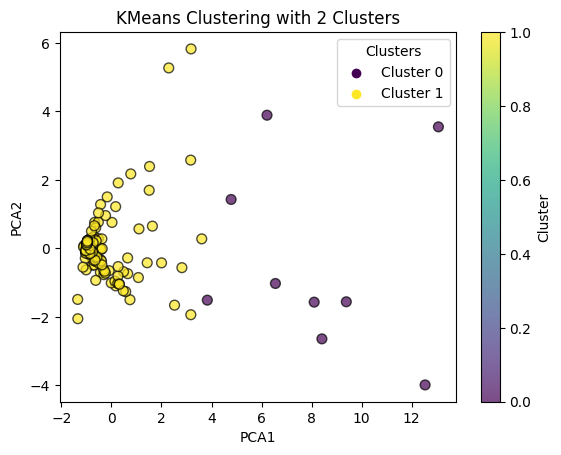

In [3]:
# KMeans
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(features_scaled)
df['kmeans_2'] = kmeans2.labels_

# silhouette score
score = silhouette_score(features_scaled, kmeans2.labels_)
print("Silhouette Score: ", score)

# PCA for plot
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['kmeans_2']

scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis',alpha=0.7,
                       marker='o', s=50, edgecolor='k')
for i in range(2):  
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering with 2 Clusters')
plt.show()

Silhouette Score:  0.7119496186066665


C:\Users\Asus\AppData\Local\Temp\ipykernel_31856\1249691384.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])


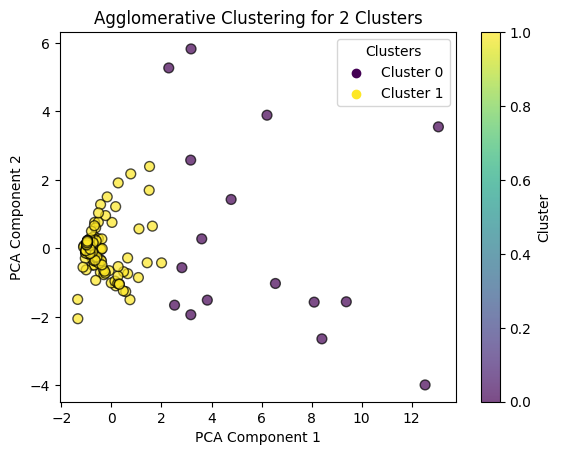

In [4]:
# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)  
agg_labels = agg_cluster.fit_predict(features_scaled)
df['agg_cluster'] = agg_labels

# silhouette score
score = silhouette_score(features_scaled, agg_labels)
print("Silhouette Score: ", score)

# plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agg_labels, 
                      cmap='viridis', s=50, edgecolor='k', alpha=0.7)
plt.title("Agglomerative Clustering for 2 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

legend_labels = ["Cluster 0", "Cluster 1"]
for i in range(2):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()


Silhouette Score: 0.773480274021303


C:\Users\Asus\AppData\Local\Temp\ipykernel_31856\2711795428.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])


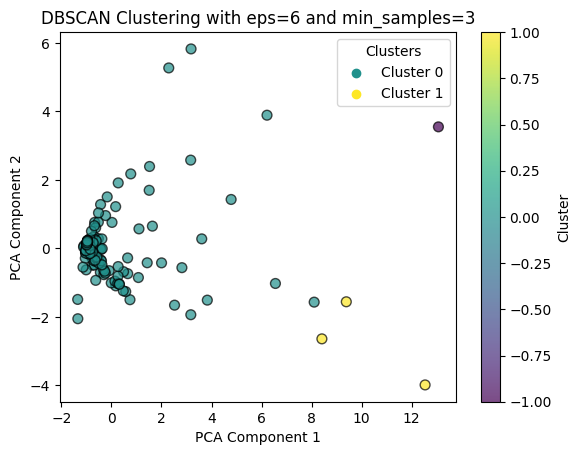

In [11]:
# DBSCAN
dbscan = DBSCAN(eps=6, min_samples=3)
dbscan.fit(features_scaled)
labels = dbscan.labels_
df['dbscan_cluster'] = labels

# silhouette score
score = silhouette_score(features_scaled, labels, metric='euclidean')
print("Silhouette Score:", score)

# plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', 
                      marker='o', s=50, edgecolor='k', alpha=0.7)
plt.title("DBSCAN Clustering with eps=6 and min_samples=3")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

legend_labels = ["Cluster 0", "Cluster 1"]
for i in range(2):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()


Score=0.307533406944091


C:\Users\Asus\AppData\Local\Temp\ipykernel_31856\3891554503.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])


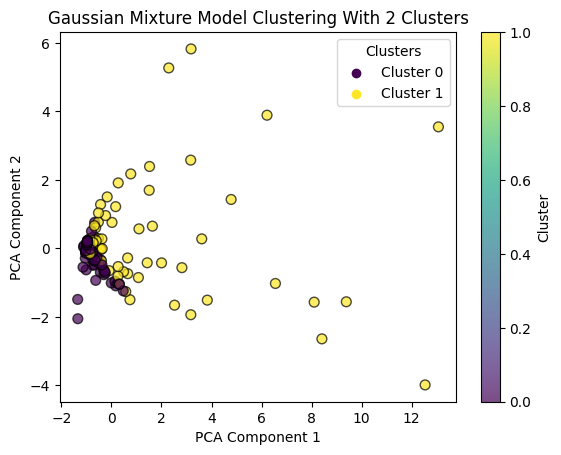

In [7]:
# GMM
gmm = GaussianMixture(n_components=2, random_state=42)  
gmm_labels = gmm.fit_predict(features_scaled)
df['gmm_cluster2'] = gmm_labels

# score
score = silhouette_score(features_scaled, gmm_labels)
print(f'Score={score}')

# plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_labels, 
                      cmap='viridis', s=50, edgecolor='k', alpha=0.7)
plt.title("Gaussian Mixture Model Clustering With 2 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
legend_labels = ["Cluster 0", "Cluster 1"]
for i in range(2):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

Silhouette Score:  0.1913280795648169


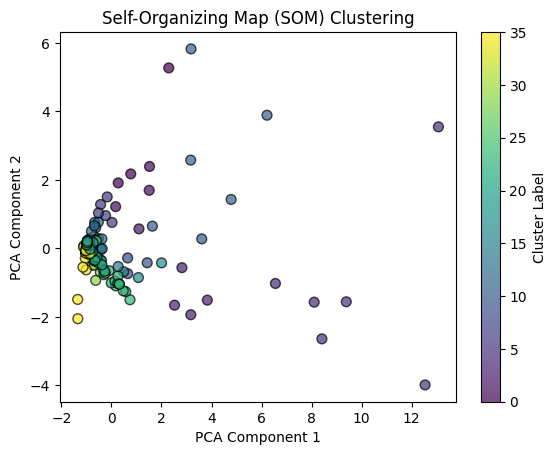

In [8]:
# SOM
features_scaled_arr = features_scaled.values
som_dim = (6, 6)  
som = MiniSom(som_dim[0], som_dim[1], features_scaled_arr.shape[1], sigma=2.0, learning_rate=0.05)
som.random_weights_init(features_scaled_arr)  
som.train_batch(features_scaled_arr, 5000)
som_labels = np.array([som.winner(x) for x in features_scaled_arr])

unique_labels = {tuple(coord): idx for idx, coord in enumerate(np.unique(som_labels, axis=0))}
df['som_cluster'] = [unique_labels[tuple(coord)] for coord in som_labels]

# silhouette score
som_cluster_labels = df['som_cluster'].values
score = silhouette_score(features_scaled_arr, som_cluster_labels)
print("Silhouette Score: ", score)

# plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled_arr)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['som_cluster'], 
            cmap='viridis', s=50, edgecolor='k',alpha=0.7)
plt.title("Self-Organizing Map (SOM) Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")  
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Silhouette Score:  0.20666432370745025


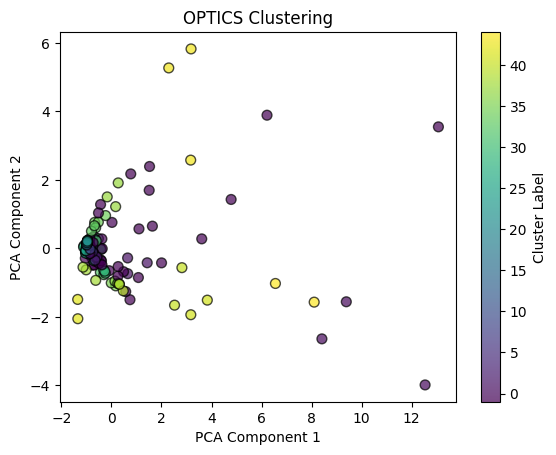

In [9]:
# OPTICS
optics = OPTICS(min_samples=2, max_eps=6.0)  
optics_labels = optics.fit_predict(features_scaled)
df['optics_cluster'] = optics_labels

# silhouette score
score = silhouette_score(features_scaled, optics_labels)
print("Silhouette Score: ", score)

# plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=optics_labels, 
            cmap='viridis', s=50, edgecolor='k',alpha=0.7)
plt.title("OPTICS Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

Silhouette Score: 0.7894385375337405


C:\Users\Asus\AppData\Local\Temp\ipykernel_31856\1523431189.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])


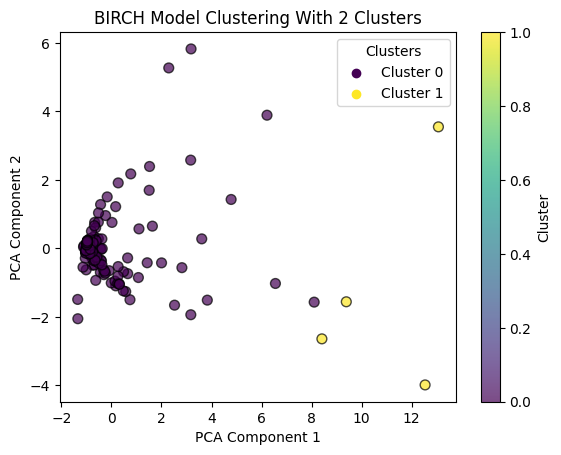

In [19]:
birch = Birch(n_clusters=2)
birch_labels = birch.fit_predict(features_scaled)
df['birch_cluster'] = birch_labels

# Evaluate
score = silhouette_score(features_scaled, birch_labels)
print("Silhouette Score:", score)

# plot
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=birch_labels, 
                      cmap='viridis', s=50, edgecolor='k', alpha=0.7)
plt.title("BIRCH Model Clustering With 2 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
legend_labels = ["Cluster 0", "Cluster 1"]
for i in range(2):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=legend_labels[i])

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [22]:
df.to_csv('cluster_result.csv',index=False)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,github user count,wiki view Oct 2024,search count Oct 2024,stack_overflow_count_2024,location_count,...,search count Oct 2024_T,stack_overflow_count_2024_T,location_count_T,kmeans_2,agg_cluster,dbscan_cluster,gmm_cluster2,som_cluster,optics_cluster,birch_cluster
0,Java,10.51,728,6.153528e+06,103000,6800,1577.0,13,202,12,...,0.363212,2.071070,2.917045,0,0,1,1,5,0,1
1,JavaScript,3.54,1111,6.168157e+06,118000,11400,2134.0,18,474,12,...,0.663600,5.339627,2.917045,0,0,1,1,5,0,1
2,Dart,0.56,32,6.250161e+06,945,877,170.0,0,129,6,...,-0.417797,1.193847,0.930730,1,1,0,1,8,1,0
3,Node.js,0.00,450,5.596209e+06,34000,-1,399.0,4,291,8,...,-0.177486,3.140561,1.592835,1,0,0,1,3,41,0
4,PHP,1.21,505,5.762279e+06,123000,8600,1445.0,16,272,11,...,0.543445,2.912243,2.585993,0,0,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1,-1.0,0,0,1,...,-0.417797,-0.356314,-0.724532,1,1,0,0,30,16,0
171,VBScript,0.33,2,3.327448e+06,692,-1,80.0,11,0,1,...,0.243057,-0.356314,-0.724532,1,1,0,1,12,33,0
172,CORAL,0.00,1,3.244448e+06,0,-1,-1.0,0,0,1,...,-0.417797,-0.356314,-0.724532,1,1,0,0,24,19,0
173,UniVerse,0.00,1,1.520833e+06,0,-1,-1.0,0,0,1,...,-0.417797,-0.356314,-0.724532,1,1,0,0,18,23,0


In [12]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=3, metric='euclidean')
labels = hdb.fit_predict(features_scaled.values)

valid_labels = labels[labels != -1]  
valid_data = features_scaled[labels != -1]

if len(np.unique(valid_labels)) > 1:  # Check if there are at least 2 clusters
    score = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score (excluding noise): {score}")
else:
    print("Silhouette Score cannot be calculated due to insufficient clusters.")

# Display labels
print("Cluster Labels:", labels)

Silhouette Score (excluding noise): 0.45652421553907335
Cluster Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  2  5  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1  0  0  4 -1  1 -1  2  4 -1  0  0  3 -1  3  4 -1  5 -1 -1 -1
  5  0  1  0  0  1  5  1 -1  5  1  4  1  0 -1  1 -1  0  5  2 -1  3  3  3
 -1 -1  1  1  2 -1 -1 -1 -1 -1  3 -1  4 -1  5 -1 -1 -1 -1 -1  5  5  0  1
  2 -1 -1  2  2  2 -1 -1 -1  5  1  4  1  1 -1 -1 -1 -1  5  5 -1 -1 -1  5
 -1 -1 -1  5 -1  5 -1 -1 -1  5 -1  5  1 -1 -1 -1 -1 -1  5 -1  5  5  5  5
  5 -1  5 -1  5 -1 -1]


In [ ]:
from sklearn.cluster import SpectralClustering
# Perform clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
labels = sc.fit_predict(features_scaled)

# Evaluate using silhouette score
score = silhouette_score(features_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.008367447683628487


In [15]:
from sklearn.cluster import AffinityPropagation

# Perform clustering
ap = AffinityPropagation(random_state=42)
labels = ap.fit_predict(features_scaled)

# Evaluate
score = silhouette_score(features_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.3324950892202459


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from keras.models import Model
from keras.layers import Input, Dense

# Build autoencoder
input_dim = features_scaled.shape[1]
encoding_dim = 5  # Number of dimensions for compressed representation

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)
encoder_model = Model(input_layer, encoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(features_scaled, features_scaled, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Use encoder to transform data
compressed_data = encoder_model.predict(features_scaled)

# Apply KMeans on compressed data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(compressed_data)

# Evaluate
score = silhouette_score(features_scaled, labels)
print("Silhouette Score:", score)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Silhouette Score: 0.6548705837371577
